<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
# Step 2: Make a copy and clean string columns (strip whitespace + lowercase)
df_cleaned = df.copy()
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip().str.lower()

# Step 3: Identify duplicate rows based on a relevant subset of columns
subset_cols = ['MainBranch', 'Age', 'Employment', 'RemoteWork']
duplicate_rows = df_cleaned[df_cleaned.duplicated(subset=subset_cols)]

print("✅ Number of duplicate rows based on subset:", duplicate_rows.shape[0])
print(duplicate_rows.head())

# Step 4: Drop the duplicates (optional step if you want to clean them)
df_cleaned.drop_duplicates(subset=subset_cols, inplace=True)

# Step 5: Print the new shape to confirm cleanup
print("🧹 Dataset shape after removing duplicates:", df_cleaned.shape)

✅ Number of duplicate rows based on subset: 63830
    ResponseId                      MainBranch                 Age  \
16          17     i code primarily as a hobby  under 18 years old   
18          19  i am a developer by profession     25-34 years old   
19          20  i am a developer by profession     35-44 years old   
22          23  i am a developer by profession     45-54 years old   
25          26  i am a developer by profession     45-54 years old   

             Employment                            RemoteWork   Check  \
16   student, full-time                                   nan  apples   
18  employed, full-time  hybrid (some remote, some in-person)  apples   
19  employed, full-time  hybrid (some remote, some in-person)  apples   
22  employed, full-time                                remote  apples   
25  employed, full-time  hybrid (some remote, some in-person)  apples   

                                     CodingActivities  \
16                               

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
## Write your code here
# Count missing values in the 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

print(f"Number of missing values in 'CodingActivities': {missing_coding_activities}")


Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here
# Impute missing values in 'CodingActivities' using forward-fill
df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')

# Verify that there are no more missing values
print("Missing values in 'CodingActivities' after forward-fill:", df['CodingActivities'].isnull().sum())


Missing values in 'CodingActivities' after forward-fill: 0


/tmp/ipykernel_1277/4039217150.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'] = df['CodingActivities'].fillna(method='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
## Write your code here
# Identify columns that are compensation-related
comp_cols = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower() or 'pay' in col.lower()]

# Display compensation-related columns
print("Compensation-related columns found:\n", comp_cols)


Compensation-related columns found:
 ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [12]:
## Write your code here
!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

# Drop rows where ConvertedCompYearly is missing
df_comp = df[['ConvertedCompYearly']].dropna()

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_comp['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df_comp[['ConvertedCompYearly']])

# Merge the scaled column back into the original DataFrame
df['ConvertedCompYearly_MinMax'] = df_comp['ConvertedCompYearly_MinMax']

# Display summary statistics
print(df['ConvertedCompYearly_MinMax'].describe())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 116.3 MB/s eta 0:00:00a 0:00:01
count    23435.000000
mean         0.005300
std          0.011488
min          0.000000
25%          0.002012
50%          0.003998
75%          0.006642
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [13]:
## Write your code here
import numpy as np

# Create a copy to avoid modifying the original DataFrame
df_zscore = df.copy()

# Calculate mean and standard deviation, excluding missing values
mean_comp = df_zscore['ConvertedCompYearly'].mean(skipna=True)
std_comp = df_zscore['ConvertedCompYearly'].std(skipna=True)

# Apply Z-score normalization only to non-null values
df_zscore['ConvertedCompYearly_Zscore'] = df_zscore['ConvertedCompYearly'].apply(
    lambda x: (x - mean_comp) / std_comp if pd.notnull(x) else np.nan
)

# Show summary of the new column
print(df_zscore['ConvertedCompYearly_Zscore'].describe())


count    2.343500e+04
mean     1.637265e-17
std      1.000000e+00
min     -4.613176e-01
25%     -2.861649e-01
50%     -1.132771e-01
75%      1.168161e-01
max      8.658551e+01
Name: ConvertedCompYearly_Zscore, dtype: float64


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


count    2.343500e+04
mean     1.637265e-17
std      1.000000e+00
min     -4.613176e-01
25%     -2.861649e-01
50%     -1.132771e-01
75%      1.168161e-01
max      8.658551e+01
Name: ConvertedCompYearly_Zscore, dtype: float64


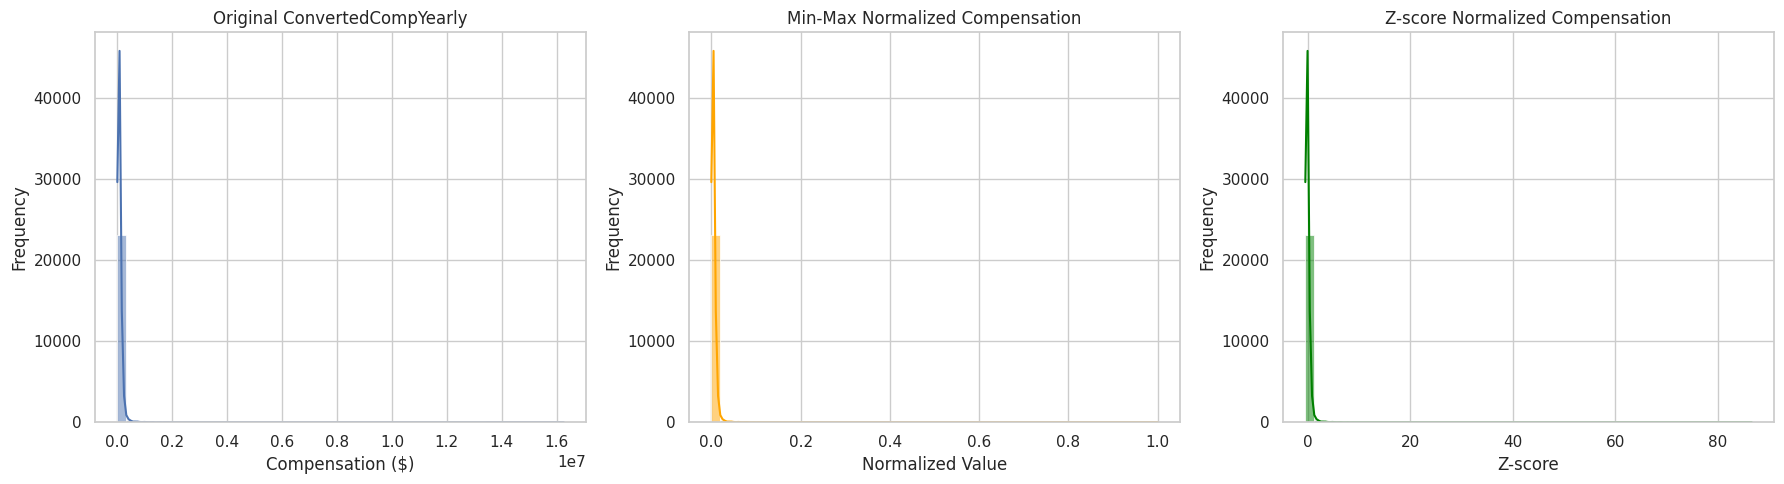

In [15]:
## Write your code here
# Calculate Z-score normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()

# Confirm the column is created
print(df['ConvertedCompYearly_Zscore'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with 3 subplots
plt.figure(figsize=(18, 5))

# Plot original ConvertedCompYearly
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Original ConvertedCompYearly')
plt.xlabel('Compensation ($)')
plt.ylabel('Frequency')

# Plot Min-Max Normalized Compensation
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'].dropna(), bins=50, kde=True, color='orange')
plt.title('Min-Max Normalized Compensation')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

# Plot Z-score Normalized Compensation
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'].dropna(), bins=50, kde=True, color='green')
plt.title('Z-score Normalized Compensation')
plt.xlabel('Z-score')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
